In [15]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts


In [16]:
mouse = pd.read_csv("resources/Mouse_metadata.csv")
study = pd.read_csv("resources/Study_results.csv")

In [17]:
mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [18]:
study.head()
print(study.shape)
print(mouse.shape)

(1893, 4)
(249, 5)


In [19]:
df = pd.merge(mouse, study, how='left', on="Mouse ID")

drug = df['Drug Regimen'].value_counts()
drug

df['Drug Regimen'].unique()

drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [20]:
grouped = df.groupby(['Drug Regimen'])
grouped.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.


In [21]:

tumor_mean = grouped['Tumor Volume (mm3)'].mean()
tumor_median = grouped['Tumor Volume (mm3)'].median()
tumor_var = grouped['Tumor Volume (mm3)'].var()
tumor_std = grouped['Tumor Volume (mm3)'].std()
tumor_sem = grouped['Tumor Volume (mm3)'].sem()


In [22]:
by_drug = pd.DataFrame({'Avg Tumor Volume (mm3)': tumor_mean,
                       'Median Tumor Volume (mm3)': tumor_median,
                        'VAR Tumor Volume (mm3)': tumor_var,
                        'STD Tumor Volume (mm3)': tumor_std,
                        'SEM Tumor Volume (mm3)': tumor_sem
                       
                       })



by_drug.index.name = 'Drug Regimen'


by_drug

,Avg Tumor Volume (mm3),Median Tumor Volume (mm3),VAR Tumor Volume (mm3),STD Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
by_drug = by_drug.reset_index()

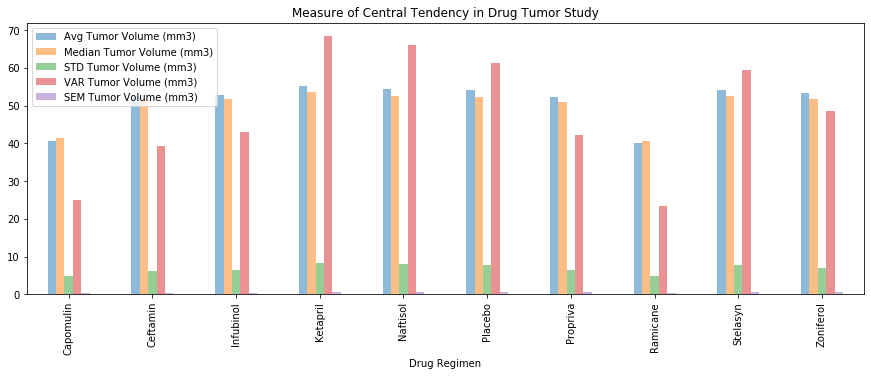

In [55]:
title = "Measure of Central Tendency in Drug Tumor Study"

by_drug.plot(x="Drug Regimen", y=["Avg Tumor Volume (mm3)", "Median Tumor Volume (mm3)", "STD Tumor Volume (mm3)",
                                 "VAR Tumor Volume (mm3)", "SEM Tumor Volume (mm3)"], 
             kind="bar", alpha=0.5, figsize=(15, 5), title=title)


plt.savefig('resources/images/all_together_data_bar.png')
plt.show()

Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of data points for each treatment regimen.

In [25]:
trail_count = grouped['Mouse ID'].count()

trail_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

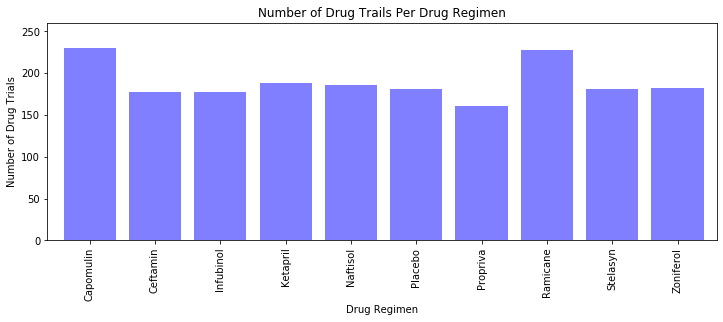

In [54]:
x_axis = np.arange(len(drugs))
tick_locations = [value+0.4 for value in x_axis]


fig_1 = plt.figure(figsize=(12,4))

# Create a list indicating where to write x labels
plt.bar(x_axis, trail_count, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, by_drug["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(trail_count)+30)

# Set a Title and labels
plt.title("Number of Drug Trails Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug Trials")

plt.savefig('resources/images/data_bar.png')
plt.show()

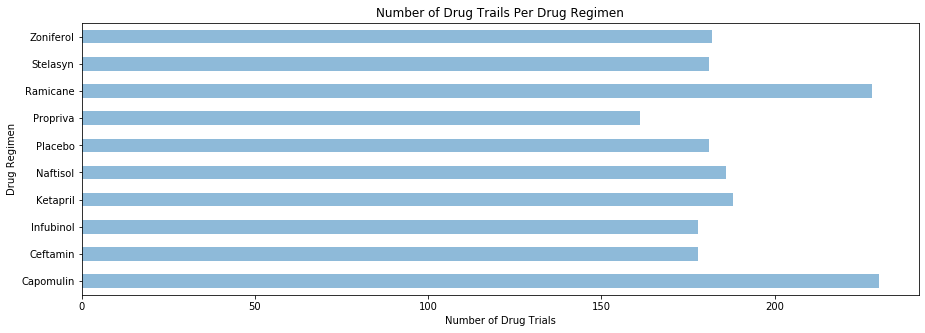

In [53]:
# with Pandas (dataframe.plot)
fig_1_barh = plt.figure

title = "Number of Drug Trails Per Drug Regimen"
trail_count.plot(kind="barh", alpha=0.5, figsize=(15, 5), legend=False, title=title)
plt.xlabel("Number of Drug Trials")                            
plt.ylabel("Drug Regimen") 

plt.savefig('resources/images/data_barh.png')
plt.show()

In [28]:
gender = df['Sex'].value_counts()
print(gender)
labels = ['Male', 'Female']

Male      958
Female    935
Name: Sex, dtype: int64


Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

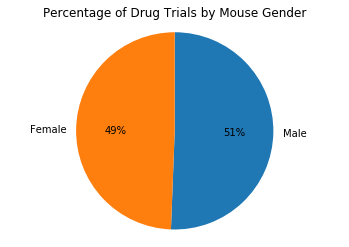

In [52]:
plt.pie(gender, labels=labels, autopct="%1.0f%%", counterclock=False, startangle=90)
plt.title('Percentage of Drug Trials by Mouse Gender')
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.savefig('resources/images/gender_pie.png')
plt.show()

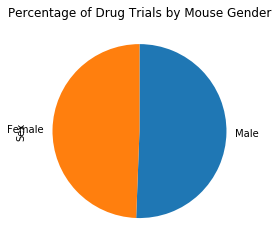

In [30]:
title = 'Percentage of Drug Trials by Mouse Gender'
gender.plot(kind="pie", startangle=90, counterclock=False, title=title)

plt.show()

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
Capomulin, Ramicane, Infubinol, and Ceftamin.

In [31]:

list(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].min().sort_values().reset_index().head(4)['Drug Regimen'])


['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

In [32]:
top_four = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
cond = (df['Drug Regimen'].isin(top_four))
max_df = df[cond].groupby(['Mouse ID','Drug Regimen'], as_index=False)['Timepoint'].max()
max_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a275,Ceftamin,45
3,a411,Ramicane,45
4,a444,Ramicane,45
...,...,...,...
95,y769,Ceftamin,45
96,y793,Capomulin,45
97,y865,Ceftamin,45
98,z578,Ramicane,45


In [33]:
new_df = pd.merge(df, max_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')

new_df.head()

new_df.groupby(['Drug Regimen'])





Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [34]:
quart_df = pd.DataFrame({ drug: new_df[new_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75,1.0]) 
                         for drug in top_four})


quart_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.50,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830
1.00,47.685963,45.220869,72.226731,68.923185


In [35]:

iqrs = []

for column in quart_df.columns:
    lowerq = float(quart_df[column][quart_df.index == 0.25].values)
    upperq = float(quart_df[column][quart_df.index == 0.75].values)
    iqr = upperq - lowerq
    iqrs.append(iqr)
quart_df.loc['IQR'] = iqrs

quart_df.head()


,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.5,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830
1.0,47.685963,45.220869,72.226731,68.923185
IQR,7.781863,9.098537,11.477135,15.577752


In [36]:
below_outliers = []
above_outliers = []


for column in quart_df.columns:
    lowerq = float(quart_df[column][quart_df.index == 0.25].values)
    upperq = float(quart_df[column][quart_df.index == 0.75].values)
    iqr = upperq - lowerq
    lower_bound = float(lowerq - (1.5*iqr))
    upper_bound = float(upperq + (1.5*iqr))
    below_outliers.append(lower_bound)
    above_outliers.append(upper_bound)    
quart_df.loc['Below Outliers'] = below_outliers
quart_df.loc['Above Outliers'] = above_outliers

quart_df.head(7)


,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.5,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830
1.0,47.685963,45.220869,72.226731,68.923185
IQR,7.781863,9.098537,11.477135,15.577752
Below Outliers,20.704562,17.912664,36.832905,25.355450
Above Outliers,51.832015,54.306811,82.741446,87.666458


In [37]:
outliers_df = pd.DataFrame({ drug: new_df[new_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in top_four})
outliers_df

cap = outliers_df['Capomulin'].dropna()
ram = outliers_df['Ramicane'].dropna()
inf = outliers_df['Infubinol'].dropna()
cef = outliers_df['Ceftamin'].dropna()

outliers_df.columns.tolist()
box_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

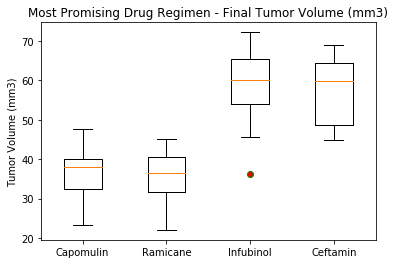

In [51]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=6,
                  linestyle='none', markeredgecolor='g')

plt.boxplot([cap, ram, inf, cef], labels=box_labels, flierprops=flierprops)
plt.title("Most Promising Drug Regimen - Final Tumor Volume (mm3)")

plt.ylabel("Tumor Volume (mm3)")
plt.savefig('resources/images/regimens_boxplot.png')
plt.show()

Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

In [39]:

capo_df = df.loc[(df['Drug Regimen'] == 'Capomulin')]

capo_df = capo_df.set_index('Mouse ID')
capo_df.head()



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0


In [40]:
mouse_id = 's185'

t_time = capo_df.loc[mouse_id, 'Timepoint']
t_volume = capo_df.loc[mouse_id, 'Tumor Volume (mm3)']
print(t_volume)

Mouse ID
s185    45.000000
s185    43.878496
s185    37.614948
s185    38.177232
s185    36.866876
s185    33.949940
s185    32.959671
s185    28.328531
s185    25.472143
s185    23.343598
Name: Tumor Volume (mm3), dtype: float64


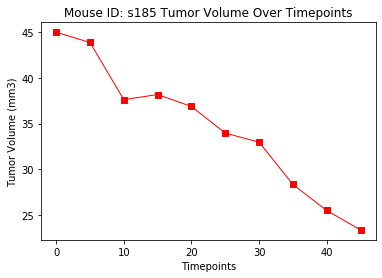

In [50]:

plt.plot(t_time, t_volume, marker="s", color="red", linewidth=1)



# Place a legend on the chart in what matplotlib believes to be the "best" location


plt.title("Mouse ID: " + mouse_id + " Tumor Volume Over Timepoints")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('resources/images/volume_timepoints_lineplot.png')
# Print our chart to the screen
plt.show()

Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

In [46]:

weight = capo_df.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean().reset_index()


weight = pd.DataFrame(weight)
weight

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


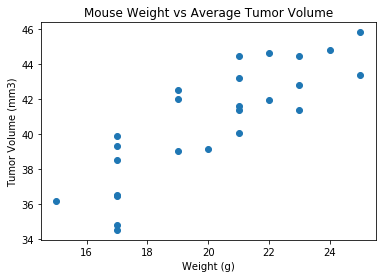

In [49]:

plt.scatter(weight['Weight (g)'], weight['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('resources/images/weight_volume_scatter.png')
plt.show()

Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
Plot the linear regression model on top of the previous scatter plot.